# IM939 - Lab 3 - Regression Exercise ANSWERS

Here you can find anwsers to the TEAM task from Week 03. Did you end up building the same linear regression model?


Here we use Scikit Learn library: https://www.tutorialspoint.com/scikit_learn/scikit_learn_linear_regression.htm


## Wine Dataset

The dataset for this task is the wine dataset. More information here: https://archive.ics.uci.edu/ml/datasets/wine+quality

_What would be your research question? What do you want to learn?_

(The wine dataset allows multiple different regression models. It is even prompted in the description of the dataset I linked above: "Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods." I will show one example here. Feel free to discuss your models in "Q&A coding" channel on Teams and share it with you colleagues!)

My **research question** is: What determines the wine density?  
Therefore my dependent variable will be "density". What will be the predictors? I could do some quick research, look for some resources in order to create some hypotheses. This would be something like theory-based approach. 
What if we didn't do any research to help us build any hypotheses about wine (maybe besisdes from some tasting ;)? That's when we need to run a lot of checks and explore data more, looking for insights or patterns. I can just try all of them, or those that make more sense to me, given that they are only 11. This would be a data-driven approach. 

## Reading Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
wine = pd.read_excel('data/raw/winequality-red_v2.xlsx', engine = 'openpyxl')

#You might need to use encoding, then the code will look like:
# wine = pd.read_excel('winequality-red_v2.xlsx', engine = 'openpyxl', encoding='UTF-8')

type(wine)

pandas.core.frame.DataFrame

## Data exploration
### Univariate analysis
It is time to check the data, their distribution and central tendencies

In [3]:
print('shape:', wine.shape)
wine.head()

shape: (1599, 12)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Look at the quality column above. It is the only column where you don't see decimals. This may suggest it is not a continuous variable. Read the dataset description: https://archive.ics.uci.edu/ml/datasets/wine+quality
It is already suggested there: "Output variable (based on sensory data): 12 - quality (score between 0 and 10)". It is the only variable that is not based on physicochemical tests. It was probably a subjective score defined by wine tasters.

If you build a regression model to explain wine quality, your research question should sound: "What determines perception of the quality of wine??" to be very precise. Do you know why?

In [4]:
wine.mean()

fixed_acidity            8.319637
volatile_acidity         0.527821
citric_acid              0.270976
residual_sugar           2.538806
chlorides                0.087467
free_sulfur_dioxide     15.874922
total_sulfur_dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

What do mean results tell us? Here they give a quick overview, suggesting that variables are in different ranges. We know that quality variable is a score between 0 and 10. Let's see what are the minimum and maximum values for the physicochemical variables:

In [5]:
wine.min()

fixed_acidity           4.60000
volatile_acidity        0.12000
citric_acid             0.00000
residual_sugar          0.90000
chlorides               0.01200
free_sulfur_dioxide     1.00000
total_sulfur_dioxide    6.00000
density                 0.99007
pH                      2.74000
sulphates               0.33000
alcohol                 8.40000
quality                 3.00000
dtype: float64

In [6]:
wine.max()

fixed_acidity            15.90000
volatile_acidity          1.58000
citric_acid               1.00000
residual_sugar           15.50000
chlorides                 0.61100
free_sulfur_dioxide      72.00000
total_sulfur_dioxide    289.00000
density                   1.00369
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
quality                   8.00000
dtype: float64

Now we can see clearly what we already suspected: the variables have different value ranges i.e. are on different scales. 
Also, it looks like that not the full quality scale is actually used in the data. The lowest score is 3, the highest 8. The total_sulfur_dioxide has values of even 289, whereas citric_acid is maximum 1. The latter may suggest it is ratio or %. But alcohol for sure is expressed in %, but the max value is only 14.9. 
What shall we do then...? Looks like standarization is needed. Or normalization?

For that we will use a short code written by de Filippi. Check also his explanation of normalization and standarisation.
https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc

In [7]:
#This is code for normalization
from sklearn import preprocessing
import numpy as np

# Normalize variable of alcohol
x_array = np.array(wine['alcohol'])
normalized_X = preprocessing.normalize([x_array])

#if you are going to use this normalized variable, or any other, remember to put its new name "normalized_X"

In [8]:
#This is code for standarization  
from sklearn import preprocessing
import numpy as np

#Get column names first
names = wine.columns
#Create the Scaler object
scaler = preprocessing.StandardScaler()
#Fit your data on the scaler object
st_wine = scaler.fit_transform(wine)
st_wine = pd.DataFrame(st_wine, columns=names)

Let's run some histograms below to check the distribution *after* the standarization. That's why we use the new data frame called "st_wine". Compare with "wine" only dataset and see what changed.

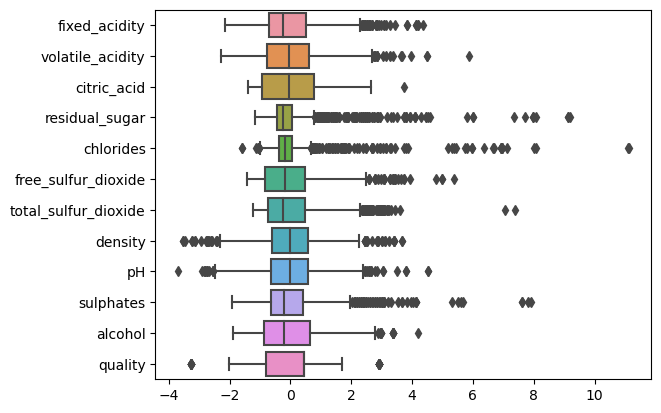

In [9]:
ax = sns.boxplot(data=st_wine, orient="h")

array([[<Axes: title={'center': 'fixed_acidity'}>,
        <Axes: title={'center': 'volatile_acidity'}>,
        <Axes: title={'center': 'citric_acid'}>],
       [<Axes: title={'center': 'residual_sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free_sulfur_dioxide'}>],
       [<Axes: title={'center': 'total_sulfur_dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

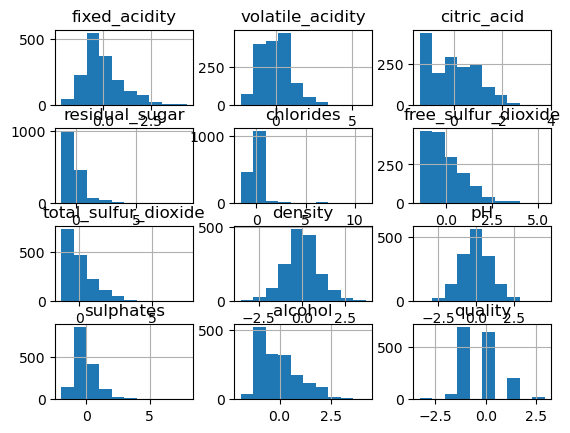

In [10]:
st_wine.hist()

You can see that some of variables are skewed. The histogram for 'wine quality' confirms it is not a continuos variable. 

### Bivariate analyis 

Let's explore a bit more towards building a regression model. First, let's check the variables using plots. 

We can use a pairplot to have a general overview on all variables. 

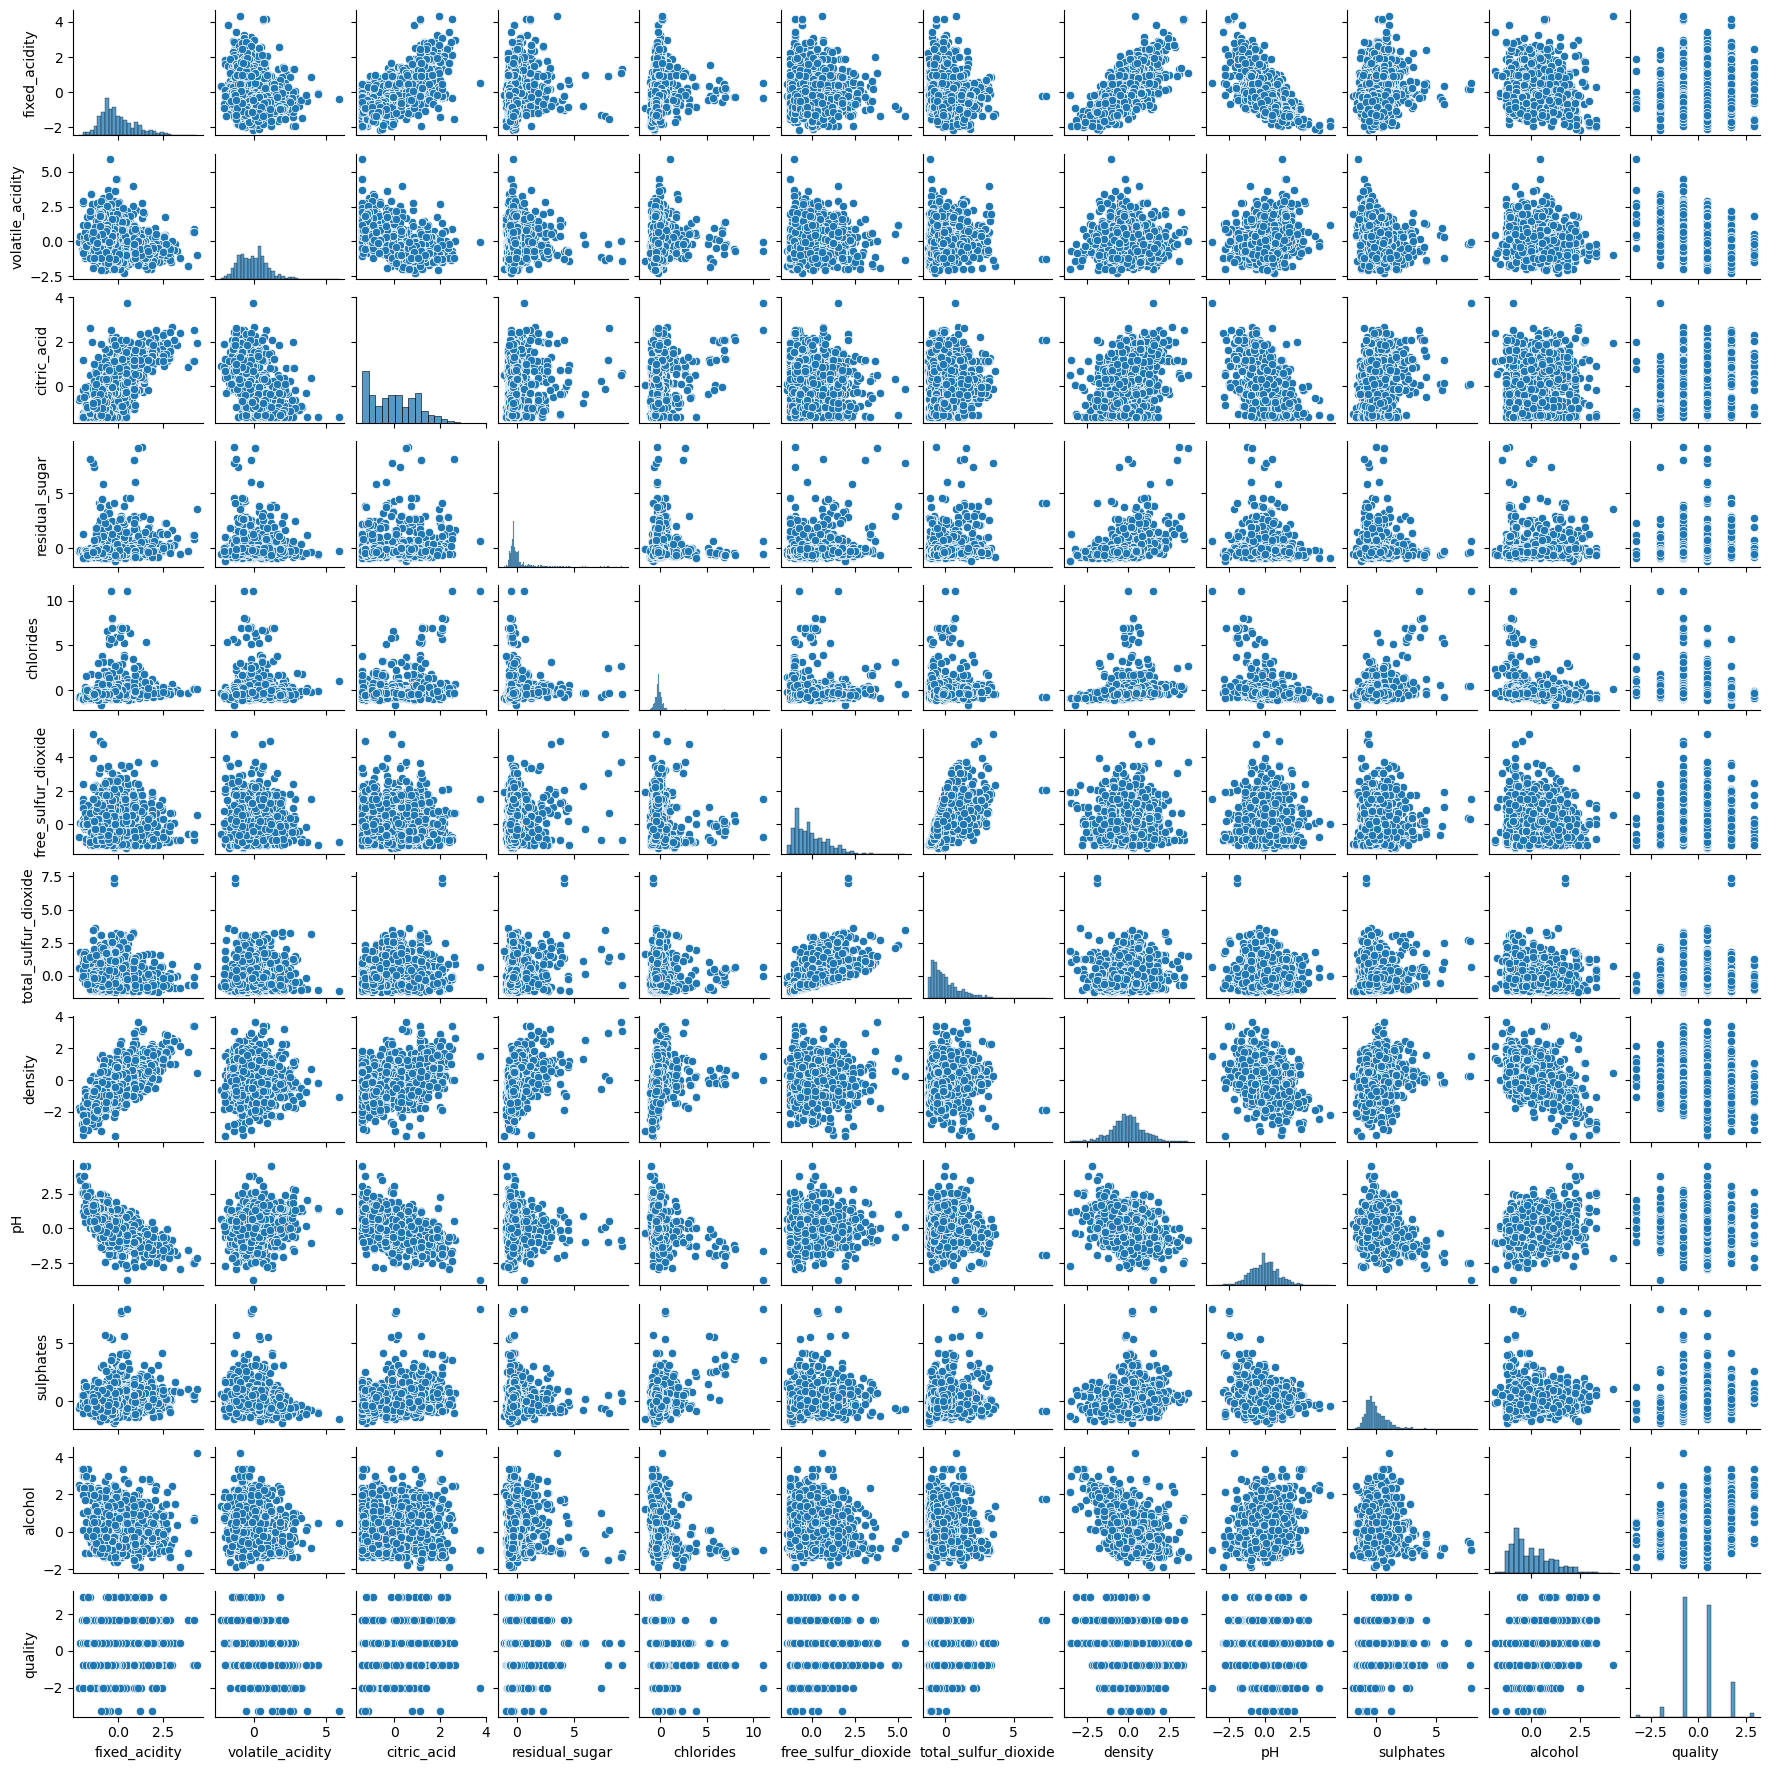

In [11]:
sns.pairplot(st_wine, height=1.5) #careful, this may take a while due to the number of columns

Given the number of variables, the pairplot is not easy to read though. 
We can either pick some variables or just plot one by one for the most relevant variables.

If we go for the second option we can use  lmplot() functions from Seaborn. This will help to explore linear relationship. Input data must be in a Pandas DataFrame. 

To plot them, we provide the potential predictor variable and response variable names along with the dataset.

Let's start with alcohol first as a potential predictor variable.

Text(0, 0.5, 'Alcohol')

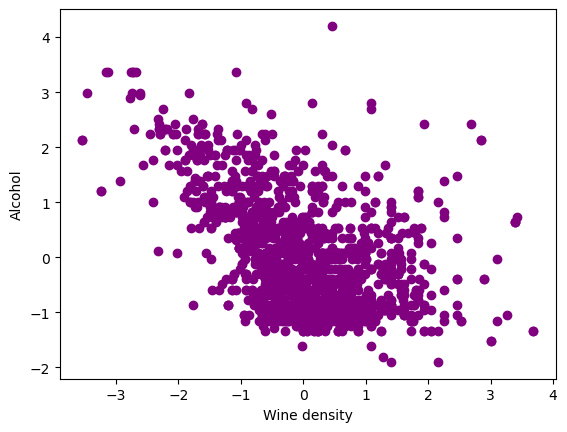

In [12]:
x = st_wine.density
y = st_wine.alcohol
plt.scatter(x, y, color = 'purple')
plt.xlabel('Wine density')
plt.ylabel('Alcohol')

What would chart look like if you were to run on original variables, before standarization? Try it - just change "st_wine" to "wine_".

# Correlation
You can calculate a Pearson correlation coefficient and the p-value for testing non-correlation.
Instead of running it one by one for every pair of variables, like:

In [13]:
import scipy.stats
#scipy.stats.pearsonr(st_wine.quality.values, st_wine.alcohol.values)
#scipy.stats.pearsonr(st_wine.quality.values, st_wine.residual_sugar.values)
scipy.stats.pearsonr(st_wine.alcohol.values, st_wine.density.values)

PearsonRResult(statistic=-0.4961797702444886, pvalue=3.9388353284269884e-100)

or you can build a correlation matrix of all variables: 

In [14]:
import scipy.stats
#instead of running it one by one for every pair of variables, like:
#scipy.stats.pearsonr(st_wine.quality.values, st_wine.alcohol.values) 

corrMatrix = st_wine.corr().round(2)
print (corrMatrix)

                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity                  1.00             -0.26         0.67   
volatile_acidity              -0.26              1.00        -0.55   
citric_acid                    0.67             -0.55         1.00   
residual_sugar                 0.11              0.00         0.14   
chlorides                      0.09              0.06         0.20   
free_sulfur_dioxide           -0.15             -0.01        -0.06   
total_sulfur_dioxide          -0.11              0.08         0.04   
density                        0.67              0.02         0.36   
pH                            -0.68              0.23        -0.54   
sulphates                      0.18             -0.26         0.31   
alcohol                       -0.06             -0.20         0.11   
quality                        0.12             -0.39         0.23   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity    

Hard to read a bit? Let's build a heatmap! I used the code from here: https://datatofish.com/correlation-matrix-pandas/ 

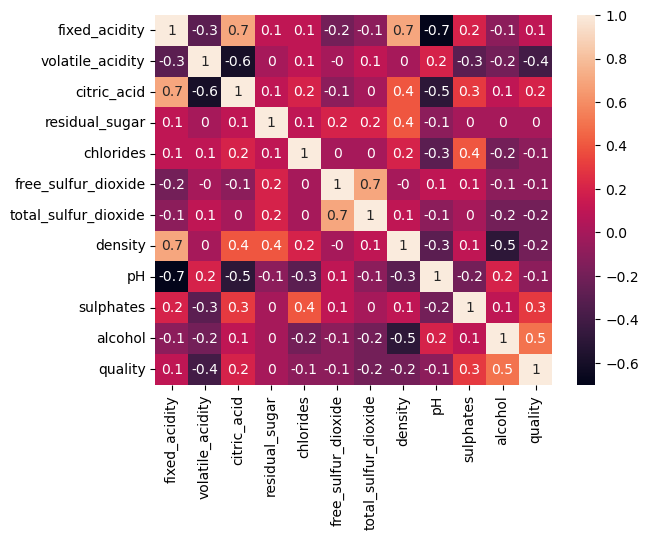

In [15]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = st_wine.corr().round(1)  #I added here ".round(1)" so that's easier to read given number of variables
sn.heatmap(corrMatrix, annot=True)
plt.show()

Can you identify some variables that are closely related? 
Try to make inferences about:
#1. pairs of variables 
#2. also about subsets of variables that might be related to one another. 

In models we build sometimes indicators that are *proxies* of some phenomena, e.g. poverty can be created from Illiteracy level, access to health and nutrition. Can you think of some indicators here?

# OLS Regression

The heatmap helps choosing good predictors. Of course, we could go further by doing some more research, but let's keep it simple here. 

## Simple Linear Regression
We will be using Scikit-learn to build a simple linear regression (OLS)

In [16]:
from sklearn.linear_model import LinearRegression

est = LinearRegression(fit_intercept = True)
x = wine[['alcohol']]
y = wine[['density']]

est.fit(x, y)

print("Coefficients:", est.coef_)
print ("Intercept:", est.intercept_)

Coefficients: [[-0.00087875]]
Intercept: [1.00590589]


What is the model's mean squared error ($MSE$) and the coefficient of determination ($R^2$) ?


MSE: 2.683398652904464e-06
R^2: 0.24619436439987263
var: density    0.000004
dtype: float64


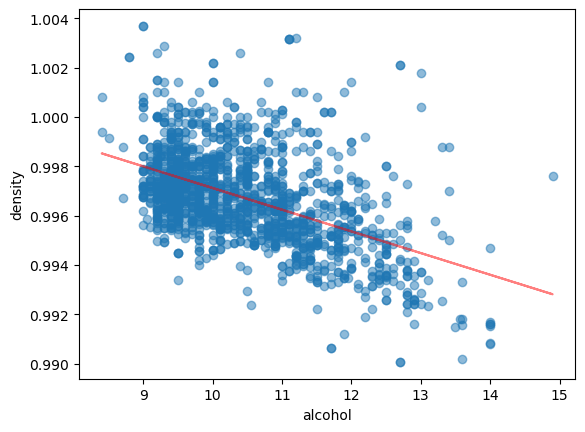

In [17]:
from sklearn import metrics

model = LinearRegression()
model.fit(x, y)
y_hat = model.predict(x)
plt.plot(x, y,'o', alpha = 0.5)
plt.plot(x, y_hat, 'r', alpha = 0.5)
plt.xlabel('alcohol')
plt.ylabel('density')
print ("MSE:", metrics.mean_squared_error(y, y_hat))
print ("R^2:", metrics.r2_score(y, y_hat))
print ("var:", y.var())
plt.savefig("wine.png", dpi = 300, bbox_inches = 'tight')

What's the conclusion? 
The regression line shows a linear relationship. We can see a negative trend. The more alcohol in the wine, the less density wine has.  

We aim for **MSE** to be low, the closer to 0 the better. It's much lower than in our icesea example.

And *$R^2$* is a bit low (0.24), given that it can have values between 0 and 1. It indicates what portion of the variance of wine density was explained - around 24%. That's why we can try adding more predictors to see if they help explain the density of wine. 
Also, in single linear regression you can use a square of correlation coefficient for variance explained: 0.49*0.49 (see correlation result above) equals 0.24 ($R^2$).

The **Intercept** tells us (the constant) is the expected mean value of Y when all X=0. In our case we have only one x - alcohol. 
How  do we interpret it?

*standarized values*: when there is no alcohol in wine, the density will be lower by -3.4 standard deviations.

*not standarized values*: when there is no alcohol in wine, the density equals 1.

**Coefficient** equals -0.496 (based on standarized values), i.e. if value of alcohol increases by 1 standard deviation, then density will decrease by 0.49 of its standard deviation. In non-standarized values it equals -0.0008, so if alcohol is increased by 1%, the density will decrease by... Exactly, how much density is a lot...? We don't know that. It's harder to interpret than e.g. 1 cm or 1 year. That's where standarized values come handy.


## Multiple linear regression
 

Now we can try adding more predictors to see if they help explain the density of wine.

In [18]:
from sklearn.linear_model import LinearRegression

est = LinearRegression(fit_intercept = True) 
x = st_wine[['alcohol','fixed_acidity']]
y = st_wine[['density']]

est.fit(x, y)

print("Coefficients:", est.coef_)
print ("Intercept:", est.intercept_)


from sklearn import metrics

model = LinearRegression()
model.fit(x, y)
y_hat = model.predict(x)
print ("MSE:", metrics.mean_squared_error(y, y_hat))
print ("R^2:", metrics.r2_score(y, y_hat))
print ("var:", y.var())

Coefficients: [[-0.45671934  0.6398822 ]]
Intercept: [-3.49267218e-14]
MSE: 0.34591353095386473
R^2: 0.6540864690461352
var: density    1.000626
dtype: float64


We can see that by adding acidity our R2 got much better. Now we continue the fun by trying to find even better model.